In [ ]:
import ray
from ray.util.dask import enable_dask_on_ray, disable_dask_on_ray
client = ray.init(
    num_cpus = 4
)
enable_dask_on_ray()

In [ ]:
import lsdb
import numpy as np
gaia = lsdb.read_hipscat("/data3/epyc/projects3/ivoa_demo/gaia/catalog")
ztf = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_dr14")
#this takes a while
ztf_sources = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source")

In [ ]:
result = gaia.cone_search(
    ra=30,
    dec=30,
    radius=1,
)

result.compute()

In [ ]:
xmatch = ztf.crossmatch(result)
xmatch.compute()

In [ ]:
join = xmatch.join(
    ztf_sources, left_on="ps1_objid_ztf_dr14", right_on="ps1_objid"
).compute()

In [ ]:
join.query(
    "nobs_g_ztf_dr14 > 20 and nobs_r_ztf_dr14 > 20 and nobs_i_ztf_dr14 > 20"
)

In [ ]:
disable_dask_on_ray()
ray.shutdown()

In [1]:

from hipscat.inspection.almanac_info import AlmanacInfo
from hipscat.inspection.almanac import Almanac
from hipscat.inspection import plot_pixels, plot_points
alm = Almanac(dirs=["/epyc/projects3/sam_hipscat/ADASS_demo/almanac/"])
gaia = alm.get_catalog("gaia")
print(gaia)

#

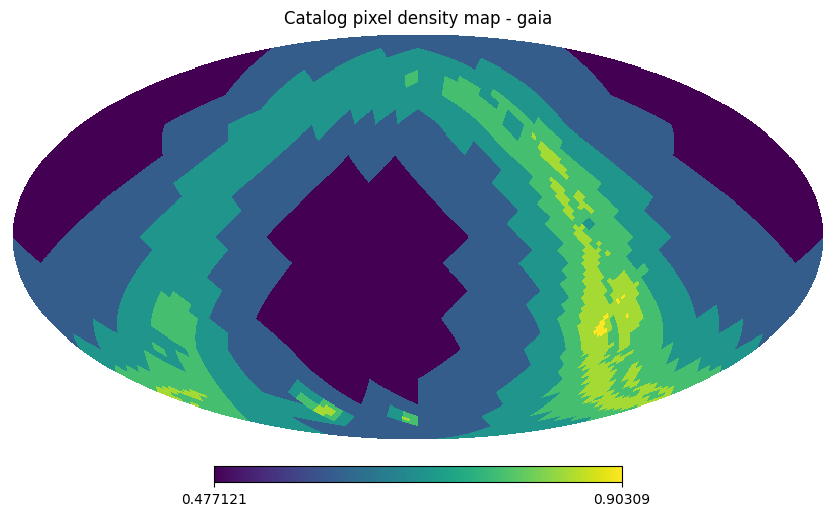

In [2]:
plot_pixels(gaia)

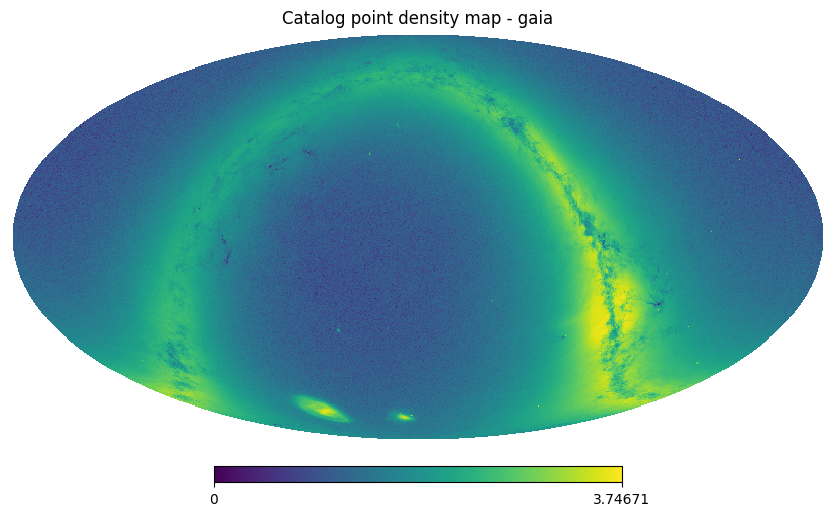

In [3]:
plot_points(gaia)

In [7]:
from hipscat.inspection.almanac_info import AlmanacInfo
from hipscat.inspection.almanac import Almanac
import os

dirpaths = "abfs:///hipscat/catalogs/"
almpath = os.path.join(dirpaths, "almanac")
storage_options = {
    "account_name" : "linccdata",
    "account_key"    : "ezBADSIGArKcI0JNHFdRfLF5S/64ZJcdrbXKbK5GJikF+YAC0hDAhMputN59HA4RS4N3HmjNZgdc+AStBFuQ6Q=="
}
cats = ["ztf_source"]
for c in cats:
    dpath = os.path.join(dirpaths, c)
    alminfo = AlmanacInfo.from_catalog_dir(dpath, storage_options)
    alminfo.write_to_file(dpath, default_dir=False, storage_options=storage_options)
    alminfo.write_to_file(almpath, default_dir=False, storage_options=storage_options)